# Netflix Content Analysis (2008-2021)

This notebook analyzes Netflix's catalog of TV shows and movies collected from Flixable, covering:
- Content types and categories
- Release trends over time
- Geographic distribution
- Ratings and durations

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Initial Inspection

In [170]:
# === Load data ===
filepath = "Netflix_Dataset.csv"
netflix_df = pd.read_csv(filepath, parse_dates=['Release_Date'])
print(f"Dataset loaded successfully with {netflix_df.shape[0]} titles")

Dataset loaded successfully with 7789 titles


In [171]:
# Basic validation
required_columns = ['Title', 'Category', 'Type', 'Release_Date', 'Rating']
missing_cols = [col for col in required_columns if col not in netflix_df.columns]
if missing_cols:
    print(f"Missing required columns: {missing_cols}")
    netflix_df = None

## Data Quality Assessment

In [172]:
# === Data Quality Assessment ===
duplicate_count = netflix_df.duplicated().sum()
if duplicate_count > 0:
    print(f"Found {duplicate_count} duplicate records - removing them")
    netflix_df.drop_duplicates(inplace=True)

Found 2 duplicate records - removing them


In [173]:
print("\n=== Missing Values Summary ===")
missing_values = netflix_df.isnull().sum()
print(missing_values[missing_values > 0])


=== Missing Values Summary ===
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
dtype: int64


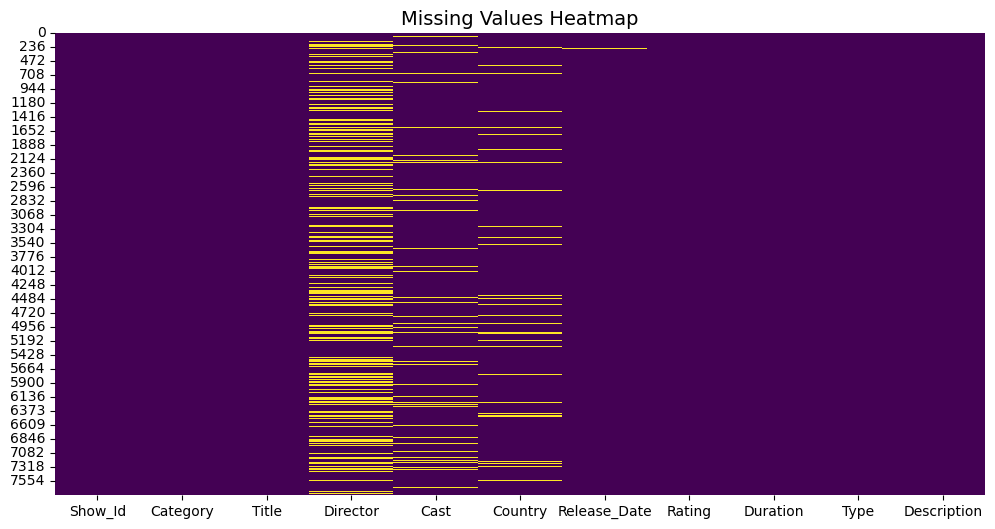

In [174]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(netflix_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14)
plt.show()

In [175]:
# Duration parsing
if 'Duration' in netflix_df.columns:
    duration_split = netflix_df['Duration'].str.split(' ', expand=True)
    netflix_df['Duration_Minutes'] = pd.to_numeric(duration_split[0], errors='coerce')
    netflix_df['Duration_Unit'] = duration_split[1]

# Content Analysis

In [176]:
print("\n=== 'House of Cards' Details ===")
house_of_cards = netflix_df[netflix_df['Title'].str.contains('House of Cards', case=False, na=False)]
display(house_of_cards[['Show_Id', 'Director']])


=== 'House of Cards' Details ===


,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [177]:
netflix_df['Release_Year'] = netflix_df['Release_Date'].str.extract(r'(\d{4})')
netflix_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Minutes,Duration_Unit,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,min,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,min,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,99,min,2020
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min,2019
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",44,min,2020
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,1,Season,2020



=== Content Release Trends ===


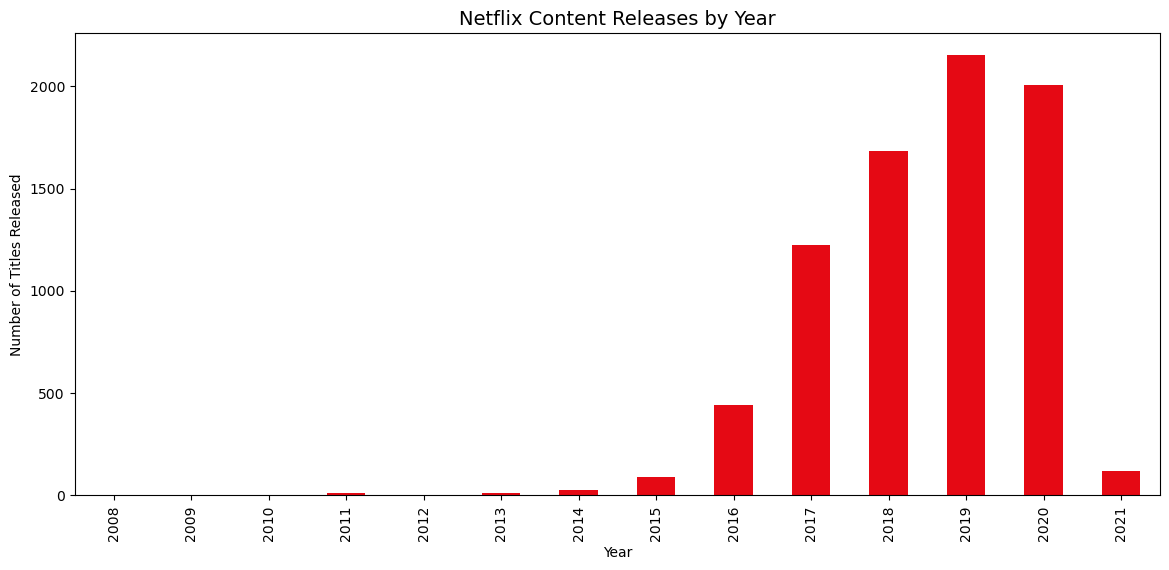

In [178]:
print("\n=== Content Release Trends ===")
yearly_releases = netflix_df['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
yearly_releases.plot(kind='bar', color='#E50914')
plt.title('Netflix Content Releases by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.show()


=== Movies vs TV Shows ===
Movies: 69.1%
TV Shows: 30.9%


C:\Users\Bhusan\AppData\Local\Temp\ipykernel_1484\2935434676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='Category', palette=['#E50914', '#221F1F'])


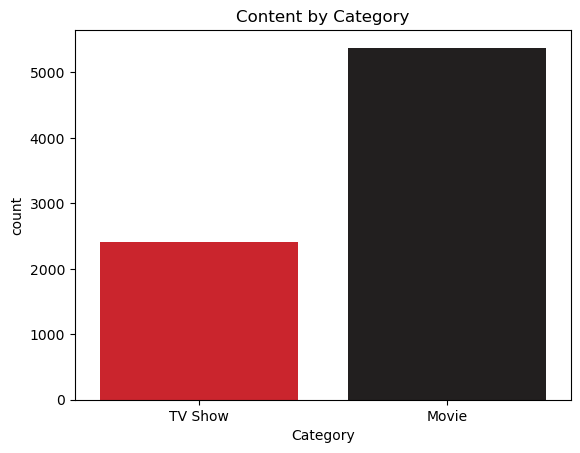

In [179]:
print("\n=== Movies vs TV Shows ===")
category_dist = netflix_df['Category'].value_counts(normalize=True)
print(f"Movies: {category_dist['Movie']:.1%}")
print(f"TV Shows: {category_dist['TV Show']:.1%}")
sns.countplot(data=netflix_df, x='Category', palette=['#E50914', '#221F1F'])
plt.title('Content by Category')
plt.show()

In [180]:
print("\n=== Movies Released in 2000 ===")
movies_2000 = netflix_df[(netflix_df['Category'] == 'Movie') & (netflix_df['Release_Year'] == 2000)]
print(f"Found {len(movies_2000)} movies from 2000")
display(movies_2000[['Title', 'Director', 'Rating']])


=== Movies Released in 2000 ===
Found 0 movies from 2000


,Title,Director,Rating


In [181]:
print("\n=== TV Shows from India ===")
india_tv = netflix_df[(netflix_df['Category'] == 'TV Show') & (netflix_df['Country'] == 'India')]
print(f"Found {len(india_tv)} Indian TV shows")
display(india_tv[['Title', 'Release_Year', 'Duration']])


=== TV Shows from India ===
Found 71 Indian TV shows


,Title,Release_Year,Duration
86,21 Sarfarosh: Saragarhi 1897,2018,1 Season
132,7 (Seven),2019,1 Season
340,Agent Raghav,2017,1 Season
364,Akbar Birbal,2020,1 Season
533,Anjaan: Rural Myths,2018,1 Season
...,...,...,...
6249,The Creative Indians,2020,2 Seasons
6400,The Golden Years with Javed Akhtar,2017,1 Season
6469,The House That Made Me,2017,3 Seasons
7294,Typewriter,2019,1 Season


In [182]:
print("\n=== Top 10 Directors ===")
top_directors = netflix_df['Director'].value_counts().head(10)
display(top_directors.to_frame('Number of Titles'))


=== Top 10 Directors ===


,Number of Titles
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12
Steven Spielberg,10
David Dhawan,9


In [183]:
print("\n=== Comedies Movies OR UK Content ===")
combined_filter = netflix_df[
    ((netflix_df['Category'] == 'Movie') & (netflix_df['Type'] == 'Comedies')) |
    (netflix_df['Country'] == 'United Kingdom')
]
display(combined_filter[['Title', 'Category', 'Type', 'Country']].head(10))


=== Comedies Movies OR UK Content ===


,Title,Category,Type,Country
19,'89,Movie,Sports Movies,United Kingdom
33,#realityhigh,Movie,Comedies,United States
58,100% Hotter,TV Show,"British TV Shows, International TV Shows, Real...",United Kingdom
72,17 Again,Movie,Comedies,United States
82,2036 Origin Unknown,Movie,Sci-Fi & Fantasy,United Kingdom
84,21 & Over,Movie,Comedies,United States
85,21 Again,TV Show,"British TV Shows, Reality TV",United Kingdom
93,27: Gone Too Soon,Movie,Documentaries,United Kingdom
148,A Bad Moms Christmas,Movie,Comedies,"United States, China"
174,A Futile and Stupid Gesture,Movie,Comedies,United States


In [184]:
print("\n=== Titles Featuring Tom Cruise ===")
tom_cruise = netflix_df[netflix_df['Cast'].str.contains('Tom Cruise', na=False)]
print(f"Tom Cruise appears in {len(tom_cruise)} titles")
display(tom_cruise[['Title', 'Category', 'Release_Year']])


=== Titles Featuring Tom Cruise ===
Tom Cruise appears in 2 titles


,Title,Category,Release_Year
3860,Magnolia,Movie,2020
5071,Rain Man,Movie,2019


In [185]:
print("\n=== Rating Distribution ===")
rating_counts = netflix_df['Rating'].value_counts()
display(rating_counts)


=== Rating Distribution ===


Rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [186]:
print("\n=== TV-14 Rated Movies in Canada ===")
tv14_ca = netflix_df[
    (netflix_df['Category'] == 'Movie') & 
    (netflix_df['Rating'] == 'TV-14') & 
    (netflix_df['Country'] == 'Canada')
]
print(f"Found {len(tv14_ca)} TV-14 movies from Canada")


=== TV-14 Rated Movies in Canada ===
Found 11 TV-14 movies from Canada


In [187]:
netflix_df['Release_Year'] = netflix_df['Release_Year'].fillna(0).astype(int)

In [188]:
print("\n=== R-Rated TV Shows After 2018 ===")
r_tv = netflix_df[
    (netflix_df['Category'] == 'TV Show') & 
    (netflix_df['Rating'] == 'R') & 
    (netflix_df['Release_Year'] > 2018)
]
print(f"Found {len(r_tv)} R-rated TV shows since 2019")


=== R-Rated TV Shows After 2018 ===
Found 1 R-rated TV shows since 2019


In [189]:
print("\n=== Duration Analysis ===")
print(f"Longest Movie: {netflix_df['Duration_Minutes'].max()} minutes")
print(f"Average Movie Duration: {netflix_df['Duration_Minutes'].mean():.1f} minutes")


=== Duration Analysis ===
Longest Movie: 312 minutes
Average Movie Duration: 69.1 minutes


In [190]:
print("\n=== Country with Most TV Shows ===")
tv_by_country = netflix_df[netflix_df['Category'] == 'TV Show']['Country'].value_counts()
print(f"Top country: {tv_by_country.index[0]} with {tv_by_country[0]} shows")


=== Country with Most TV Shows ===
Top country: United States with 705 shows


C:\Users\Bhusan\AppData\Local\Temp\ipykernel_1484\3914578002.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Top country: {tv_by_country.index[0]} with {tv_by_country[0]} shows")


In [191]:
print("\n=== Earliest Released Titles ===")
display(netflix_df.sort_values('Release_Year').head(5)[['Title', 'Category', 'Release_Year']])


=== Earliest Released Titles ===


,Title,Category,Release_Year
2288,Friends,TV Show,0
3374,Kikoriki,TV Show,0
549,Anthony Bourdain: Parts Unknown,TV Show,0
3946,Maron,TV Show,0
6066,The Adventures of Figaro Pho,TV Show,0


In [192]:
print("\n=== Dramas Movies OR Kids' TV Shows ===")
complex_filter = netflix_df[
    ((netflix_df['Category'] == 'Movie') & (netflix_df['Type'] == 'Dramas')) | 
    ((netflix_df['Category'] == 'TV Show') & (netflix_df['Type'] == "Kids' TV"))
]
display(complex_filter[['Title', 'Category', 'Type']].head(10))


=== Dramas Movies OR Kids' TV Shows ===


,Title,Category,Type
4,21,Movie,Dramas
7,187,Movie,Dramas
111,44 Cats,TV Show,Kids' TV
170,A Family Man,Movie,Dramas
232,A Stoning in Fulham County,Movie,Dramas
276,Abby Hatcher,TV Show,Kids' TV
295,Across Grace Alley,Movie,Dramas
308,Adam: His Song Continues,Movie,Dramas
330,Aftermath,Movie,Dramas
334,Agatha and the Truth of Murder,Movie,Dramas


# Advanced Visualizations 

C:\Users\Bhusan\AppData\Local\Temp\ipykernel_1484\2577273402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, y='Rating', order=netflix_df['Rating'].value_counts().index, palette='Reds_r')


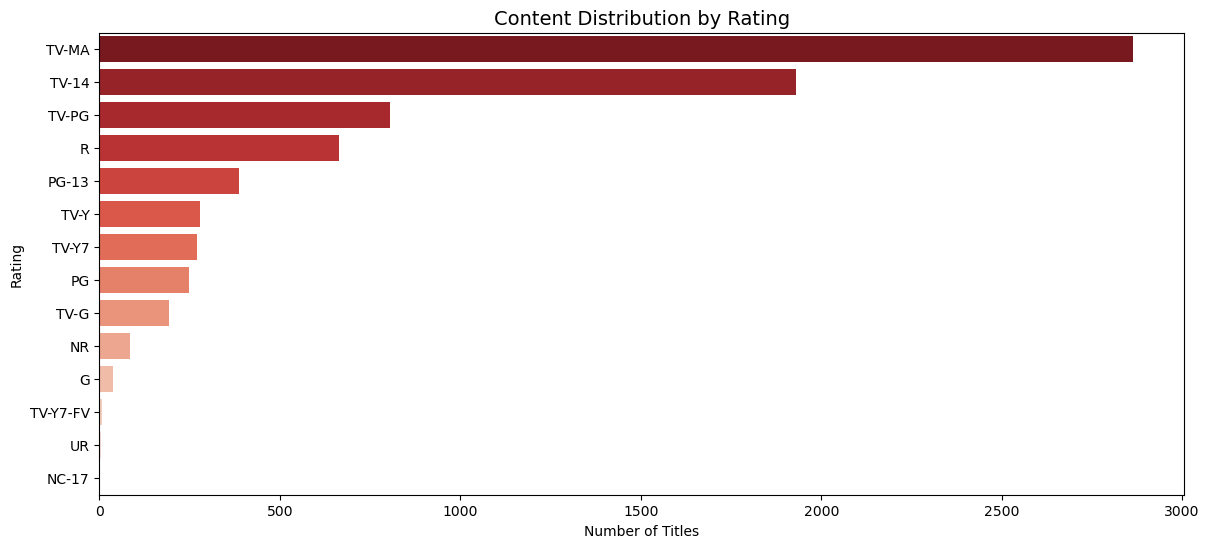

In [193]:
plt.figure(figsize=(14, 6))
sns.countplot(data=netflix_df, y='Rating', order=netflix_df['Rating'].value_counts().index, palette='Reds_r')
plt.title('Content Distribution by Rating', fontsize=14)
plt.xlabel('Number of Titles')
plt.show()

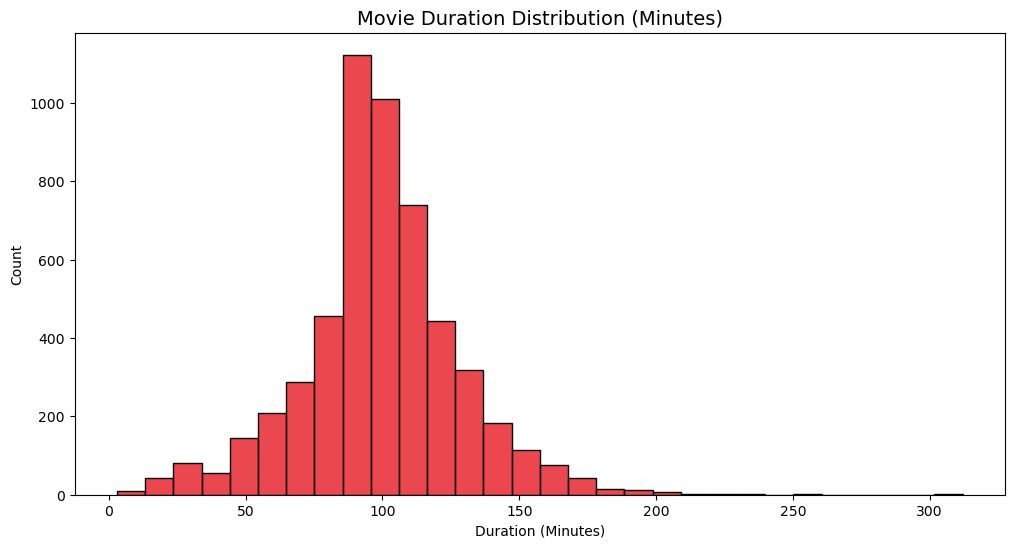

In [194]:
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df[netflix_df['Category'] == 'Movie'], x='Duration_Minutes', bins=30, color='#E50914')
plt.title('Movie Duration Distribution (Minutes)', fontsize=14)
plt.xlabel('Duration (Minutes)')
plt.show()

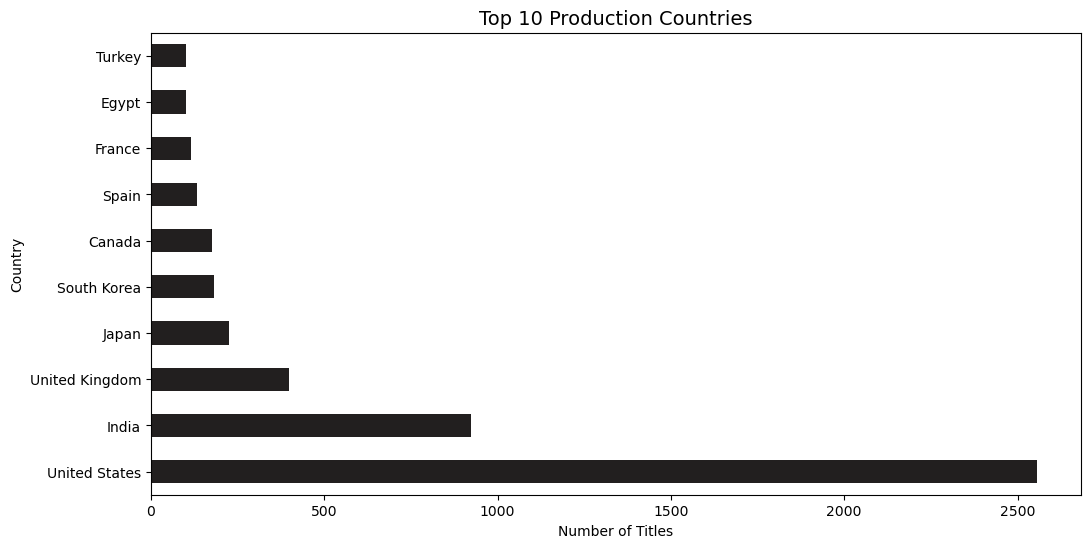

In [195]:
top_countries = netflix_df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh', color='#221F1F')
plt.title('Top 10 Production Countries', fontsize=14)
plt.xlabel('Number of Titles')
plt.show()